<a href="https://colab.research.google.com/github/Den4ik18/EMSE/blob/master/Ohorodnik_Denys_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T - розподіл

Ініціалізація датасету

In [0]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd

# зазначимо url звідки ми візьмемо дані
url = "http://www.sharecsv.com/dl/70792028b87f9e5072133ce87c32a8a7/googleplaystore.csv"

# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)

# очистимо dataframe, підготуємо його до бажаного вигляду
#df.set_index('App', inplace=True)  # встановимо колонку з іменем '№' як індекс dataframe'у

# конвертуємо колонку "Reviews" у числові значення.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# відобразимо перші 5 записів у датафреймі
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(3,0.35,'Second')

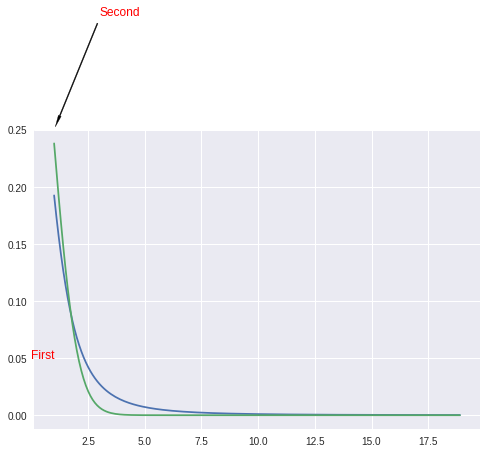

In [0]:
#T-розподіл 
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

# x = np.arange(-4,4,0.1)
#y = df['Rating'].tolist()
# Знаходимо мінімальне та максимальне значення в колонці "Rating"
minValue = df['Rating'].min()
maxValue = df['Rating'].max()

#T-розподіл будемо виконувати від minValue до maxValue збільшуючи значення на 0.1
x = np.arange(minValue,maxValue,0.1)


tvals1 = stats.t.pdf(x,2)
tvals2 = stats.t.pdf(x,30)

plt.plot(x,tvals1,x,tvals2)
plt.text(0,0.05,"First",color = "red")
plt.annotate("Second",xy=(1,0.25),xytext = (3,0.35),arrowprops=dict(facecolor="black",shrink=0.025,width=1,headwidth=3),color="red")


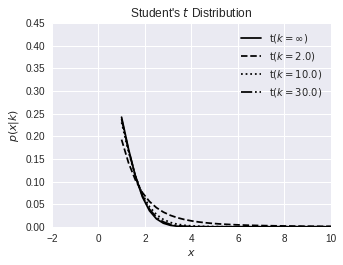

In [0]:
#Student’s t distribution
import numpy as np
from scipy.stats import t as student_t
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 2, 10, 30]
linestyles = ['-', '--', ':', '-.']
# x = np.linspace(-10, 10, 1000)
minValue = df['Rating'].min()
maxValue = df['Rating'].max()

#T-розподіл будемо виконувати від minValue до maxValue збільшуючи значення на 0.1
x = np.arange(minValue,maxValue,0.3)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-2, 10)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

# t - критерій Стьюдента

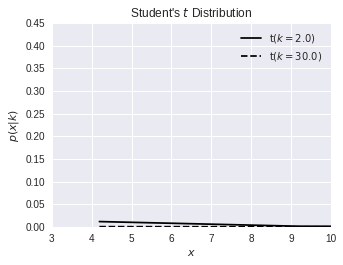

In [0]:


#T-розподіл 
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

# x = np.arange(-4,4,0.1)
#y = df['Rating'].tolist()

averageRating = df['Rating'].mean()
averageReviews = df['Reviews'].mean()


x = np.arange(averageRating,averageReviews,5)


mu = 0
k_values = [2, 30]
linestyles = ['-', '--', ':', '-.']


fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(3, 10)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

# QQ - plot

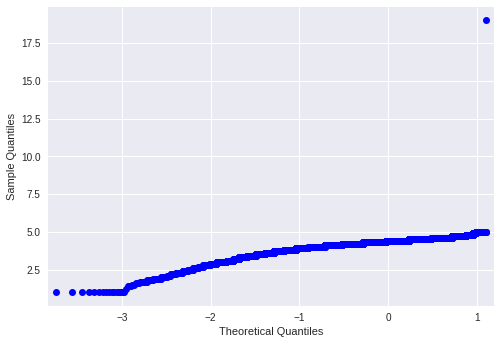

In [0]:
import numpy as np 
import pylab 
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

y = df['Rating'].tolist()

X = np.array(y)

# measurements = np.random.binomial(loc = 30, scale = 10, size=1000)   
# measurements
#stats.probplot(y, dist="norm", plot=pylab)


qqplot(X,line='s')

#pylab.show()
pyplot.show()

**По осій Y ми маємо значення колонки Reviews, а по осі X - значення Rating**


# ОДА

In [0]:
import pandas as pd
import scipy.stats as stats

#Заміняємо NaN на 0.0
df['Reviews'].fillna(0.0,inplace=True)
df['Rating'].fillna(0.0,inplace=True)
samples=[list(frame) for group,frame in df.groupby('Rating')['Reviews']]
stats.f_oneway(*samples)
#pvalue вийшло настільки мале тому що довжина рядків Rating та Reviews біліше 10 000
#і тому при обчислені виходить досить мале відхилення
#Це свідчить про те що між значеннями є мала різнця

F_onewayResult(statistic=5.878860983064541, pvalue=4.457644953708342e-29)

##T-test

In [0]:
#T-test
from scipy.stats import ttest_ind

cat1 = df[df['Rating']==4.7]
cat2 = df[df['Rating']==4.3]

ttest_ind(cat1['Reviews'], cat2['Reviews'])


Ttest_indResult(statistic=-1.7415475504675217, pvalue=0.08178313015884367)

##KS-test

In [0]:
#KS-test
from scipy.stats import ks_2samp
import numpy as np

x = df['Rating'].tolist()
y = df['Reviews'].tolist()
np.random.seed(12345678)
# x = np.random.normal(0, 1, 1000)
# y = np.random.normal(0, 1, 1000)


ks_2samp(x, y)


Ks_2sampResult(statistic=0.8612674107554654, pvalue=0.0)

** Чим ближче значення p до 0 тим більша ймовірність того, що два зразки були зроблені з одного і того ж розподілу**

##Special tests for normal distributions

In [0]:

from scipy.stats import ks_2samp
import numpy as np

x = df['Rating'].tolist()
y = df['Reviews'].tolist()
# np.random.seed(12345678)
# x = np.random.normal(0, 1, 1000)
# y = np.random.normal(0, 1, 1000)


stats.normaltest(x)

NormaltestResult(statistic=3166.265331580163, pvalue=0.0)

T-test (statistic=-1.7415475504675217, pvalue=0.08178313015884367)
Ks_2Test(statistic=0.8612674107554654, pvalue=0.0)

##Comparing two sample

In [0]:
#Comparing two samples
x = df['Reviews'].tolist()
y = df['Rating'].tolist()

rvs1 = stats.norm.rvs(x)
rvs2 = stats.norm.rvs(y)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=15.794562401935591, pvalue=6.952747556477929e-56)

# Контрольні запитання

1. Опишіть своїми словами на прикладі свого датасету процес порівняння 2х середніх, мету його застосування та технології/тулзи/засоби, які при цьому використовуються.

При порівнянні двох середніх використовується t-критерій Стьюдента. Метою його застосування є знаходження відмінності між двома середніми значеннями якоїсь вибірки. При цих порівняннях застосоються такі технології як:  scipy, numpy. 
